# **0. Thư viện cần dùng trong final project**

In [ ]:
import os
import kagglehub
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **1. Tải dataset và sao chép vào Data folder**

In [22]:
def download_and_save_data(dataset_id, dataset_folder):
    # Lấy thư mục làm việc hiện tại và tạo thư mục lưu dataset
    current_directory = os.getcwd()
    dataset_path = os.path.join(current_directory, dataset_folder)

    # Tạo thư mục nếu chưa tồn tại
    os.makedirs(dataset_path, exist_ok=True)
    print(f"Thư mục lưu dataset: {dataset_path}")

    # Tải dataset từ Kaggle
    downloaded_folder = kagglehub.dataset_download(dataset_id)
    print(f"Dataset đã được tải về: {downloaded_folder}")

    # Xác định thư mục gốc (thư mục `imakash3011`)
    root_folder = os.path.abspath(os.path.join(downloaded_folder, os.pardir))  # Lấy thư mục cha của `downloaded_folder`

    # Chỉ di chuyển các file CSV
    for file_name in os.listdir(downloaded_folder):
        if file_name.endswith(".csv"):  # Lọc các file CSV
            file_path = os.path.join(downloaded_folder, file_name)
            shutil.copy(file_path, dataset_path)
            print(f"Đã sao chép file: {file_name} -> {dataset_path}")
    print("Hoàn tất tải và sao chép file đến thư mục cần làm việc")

# ID của dataset trên Kaggle
dataset_id = "imakash3011/customer-personality-analysis"

# Tên thư mục để lưu dataset
dataset_folder = "DataSet"

# Gọi hàm tải và lưu dataset
download_and_save_data(dataset_id, dataset_folder)

Thư mục lưu dataset: f:\KHDL\final_project\Project\DataSet
Dataset đã được tải về: C:\Users\GIGABYTE\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1
Đã sao chép file: marketing_campaign.csv -> f:\KHDL\final_project\Project\DataSet
Hoàn tất tải và sao chép file đến thư mục cần làm việc


# **2. Đọc file csv và lưu vào DataFrame**

In [36]:
# Đọc file CSV và lưu vào DataFrame
def read_csv_to_dataframe(file_path):
    try:
        # Đọc file CSV
        df = pd.read_csv(file_path, delimiter='\t')
        print("File CSV đã được đọc thành công!")
        return df
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{file_path}'.")
        return None
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return None

# Đường dẫn file CSV
current_dataset_path = "DataSet/marketing_campaign.csv"
file_path = current_dataset_path  # Thay bằng đường dẫn file của bạn

# Đọc file và lưu vào DataFrame
data_df = read_csv_to_dataframe(file_path)
data_df = data_df.drop(columns=['Z_Revenue', 'Z_CostContact'])
data_df


File CSV đã được đọc thành công!


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


# **3. Explore dataset**

### **rows and columns**

In [37]:
rows, columns = data_df.shape
print("There are", rows, "objects and", columns, "features")

There are 2240 objects and 27 features


### **Meaning columns**

### People Features
- **ID**: Mã định danh duy nhất của khách hàng
- **Year_Birth**: Năm sinh của khách hàng
- **Education**: Trình độ học vấn của khách hàng
- **Marital_Status**: Tình trạng hôn nhân của khách hàng
- **Income**: Thu nhập hàng năm của hộ gia đình khách hàng
- **Kidhome**: Số trẻ em trong hộ gia đình của khách hàng
- **Teenhome**: Số thanh thiếu niên trong hộ gia đình của khách hàng
- **Dt_Customer**: Ngày khách hàng đăng ký với công ty
- **Recency**: Số ngày kể từ lần mua hàng cuối cùng của khách hàng
- **Complain**: 1 nếu khách hàng đã khiếu nại trong 2 năm qua, 0 nếu không

### Product Features
- **MntWines**: Số tiền đã chi cho rượu vang trong 2 năm qua
- **MntFruits**: Số tiền đã chi cho trái cây trong 2 năm qua
- **MntMeatProducts**: Số tiền đã chi cho các sản phẩm thịt trong 2 năm qua
- **MntFishProducts**: Số tiền đã chi cho các sản phẩm cá trong 2 năm qua
- **MntSweetProducts**: Số tiền đã chi cho các sản phẩm ngọt trong 2 năm qua
- **MntGoldProds**: Số tiền đã chi cho vàng trong 2 năm qua

### Promotion Features
- **NumDealsPurchases**: Số lần mua hàng với chiết khấu
- **AcceptedCmp1**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 1, 0 nếu không
- **AcceptedCmp2**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 2, 0 nếu không
- **AcceptedCmp3**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 3, 0 nếu không
- **AcceptedCmp4**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 4, 0 nếu không
- **AcceptedCmp5**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 5, 0 nếu không
- **Response**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch gần nhất, 0 nếu không

### Place Features
- **NumWebPurchases**: Số lần mua hàng qua trang web của công ty
- **NumCatalogPurchases**: Số lần mua hàng qua danh mục sản phẩm
- **NumStorePurchases**: Số lần mua hàng trực tiếp tại cửa hàng
- **NumWebVisitsMonth**: Số lượt truy cập trang web của công ty trong tháng vừa qua


### **Tương quan giữa các đặc trưng**

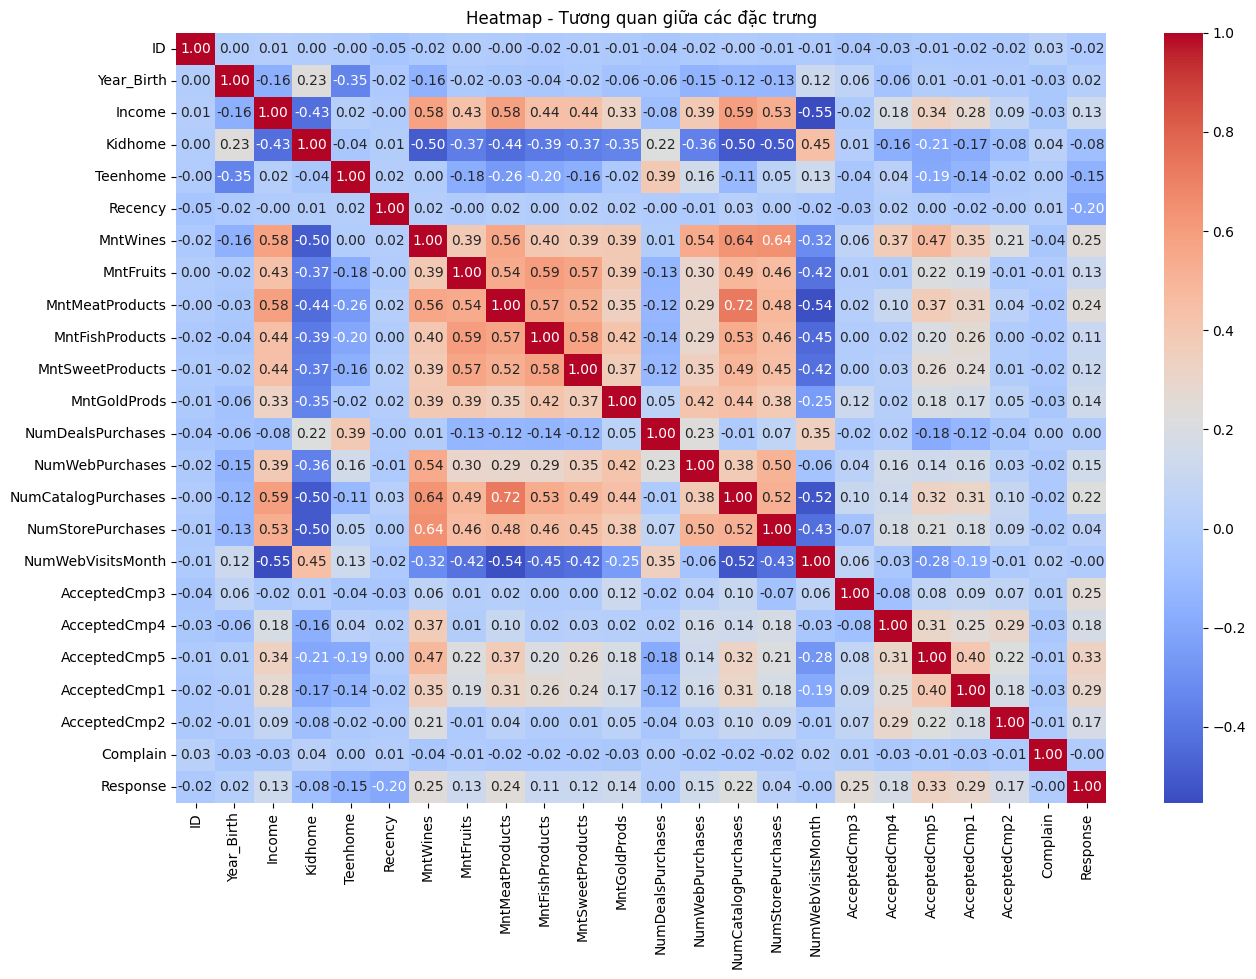

In [40]:
# Tính ma trận tương quan giữa các đặc trưng số
def correlation_matrix(data_df):
    correlation_matrix = data_df.corr(numeric_only=True)

    # Vẽ biểu đồ heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap - Tương quan giữa các đặc trưng")
    plt.show()
correlation_matrix(data_df)


# **4. Question**

## **Question 1: Phân loại theo lợi ích mang lại cho doanh nghiệp**.
---

### **Phân nhóm khách hàng**

Dựa trên các đặc trưng hành vi và thông tin, khách hàng được phân chia thành **4 nhóm chính** :
*Khách hàng trung thành*, *khách hàng tiềm năng*, *khách hàng giá trị thấp*, *khách hàng tiêu cực*.

#### **1. Khách hàng trung thành (Loyal)**
- **Đặc điểm**:
  - Chi tiêu lớn (trên ngưỡng 120% trung bình tổng chi tiêu).
  - Mua sắm thường xuyên (trên ngưỡng 120% trung bình số lần mua hàng).
  - Không có khiếu nại và mua hàng trong thời gian gần đây.
- **Ý nghĩa**:
  - Mang lại giá trị lớn (gần 70% doanh thu của doanh nghiệp), cần chính sách ưu đãi đặc biệt để giữ chân.

#### **2. Khách hàng tiềm năng (Potential)**
- **Đặc điểm**:
  - Chi tiêu và tần suất mua hàng ở mức trung bình (80% - 120% giá trị trung bình).
  - Có dấu hiệu phản hồi tích cực với chiến dịch tiếp thị.
- **Ý nghĩa**:
  - Có khả năng chuyển đổi thành khách hàng trung thành.
  - Cần chiến lược thúc đẩy mua hàng và gia tăng gắn kết.

#### **3. Khách hàng giá trị thấp (Low value)**
- **Đặc điểm**:
  - Chi tiêu thấp (dưới 50% trung bình tổng chi tiêu).
  - Tần suất mua hàng thấp (dưới 50% trung bình số lần mua hàng).
  - Chủ yếu tìm kiếm các sản phẩm giá rẻ.
- **Ý nghĩa**:
  - Mang lại giá trị thấp, nên áp dụng chiến lược tiếp thị tiết kiệm chi phí.

#### **4. Khách hàng tiêu cực (Negative)**
- **Đặc điểm**:
  - Có khiếu nại hoặc ít gắn kết (không mua hàng trong thời gian dài).
  - Tần suất mua hàng rất thấp.
- **Ý nghĩa**:
  - Cần chiến lược cải thiện trải nghiệm hoặc cân nhắc giảm chi phí tiếp thị.
---

### **Lợi ích của bài toán**

#### **1. Quản lý khách hàng hiệu quả**
- Xác định rõ ai mang lại giá trị lớn, ai cần đầu tư nhiều hơn.

#### **2. Tối ưu hóa chiến lược tiếp thị**
- Tiết kiệm chi phí tiếp thị và tăng hiệu quả chiến dịch bằng cách tập trung đúng nhóm khách hàng.

#### **3. Duy trì và phát triển khách hàng trung thành**
- Xây dựng mối quan hệ bền vững với khách hàng giá trị cao.
---

### **Kết quả mong muốn**

#### **1. Dữ liệu đầu ra**
- Một tệp CSV tổng hợp chứa toàn bộ dữ liệu khách hàng, bao gồm nhóm phân loại.
- Các tệp CSV riêng biệt cho từng nhóm khách hàng để dễ dàng phân tích và triển khai chiến dịch.

#### **2. Phân tích và ứng dụng**
- Doanh nghiệp có thể hiểu rõ đặc điểm từng nhóm khách hàng.
- Tập trung nguồn lực vào các nhóm giá trị cao như **Trung thành** và **Tiềm năng**.
- Tạo cơ sở dữ liệu để đưa ra các quyết định kinh doanh dựa trên dữ liệu.

---

## **Source**

### phân loại khách hàng

In [77]:
# Tạo các cột đặc trưng tổng hợp từ dữ liệu
data_df['Total_Spent'] = data_df['MntWines'] + data_df['MntFruits'] + data_df['MntMeatProducts'] + \
                         data_df['MntFishProducts'] + data_df['MntSweetProducts'] + data_df['MntGoldProds']
data_df['Total_Purchases'] = data_df['NumWebPurchases'] + data_df['NumCatalogPurchases'] + data_df['NumStorePurchases']

# Tính các ngưỡng tự động từ dữ liệu
mean_spent = data_df['Total_Spent'].mean()
mean_purchases = data_df['Total_Purchases'].mean()
median_recency = data_df['Recency'].median()
high_income_threshold = data_df['Income'].quantile(0.75)  # Thu nhập cao (75th percentile)
low_income_threshold = data_df['Income'].quantile(0.25)  # Thu nhập thấp (25th percentile)

# Hàm phân loại hoàn chỉnh
def classify_customer_complete(row):
    total_spent = row['Total_Spent']
    total_purchases = row['Total_Purchases']
    recency = row['Recency']
    income = row['Income']
    complain = row['Complain']
    campaign_responses = row['AcceptedCmp1'] + row['AcceptedCmp2'] + row['AcceptedCmp3'] + row['AcceptedCmp4'] + row['AcceptedCmp5']
    
    # Nhóm Trung thành
    if total_spent > mean_spent * 1.2 and total_purchases > mean_purchases * 1.2 and recency < median_recency and income > low_income_threshold and complain == 0:
        return "Loyal"
    
    # Nhóm Tiềm năng
    elif total_spent > mean_spent * 0.8 and campaign_responses > 0:
        return "Potential"
    
    # Nhóm Giá trị thấp
    elif total_spent < mean_spent * 0.5 and total_purchases < mean_purchases * 0.5 and income < low_income_threshold:
        return "Low Value"
    
    # Nhóm Tiêu cực
    elif complain == 1 or recency > median_recency * 1.5:
        return "Negative"
    
    # Xử lý nhóm "Khác" bằng cách gán vào nhóm gần nhất
    else:
        if total_spent > mean_spent:
            return "Potential"
        else:
            return "Low Value"

output_folder = "Classified_customers"
os.makedirs(output_folder, exist_ok=True)

# Áp dụng phân loại vào DataFrame
data_df['Customer_Type'] = data_df.apply(classify_customer_complete, axis=1)

# Tóm tắt phân phối nhóm khách hàng
customer_distribution_complete = data_df['Customer_Type'].value_counts()

# Hiển thị phân phối các nhóm khách hàng
print("Customer Type Distribution (Complete):")
print(customer_distribution_complete)

# Lưu toàn bộ dữ liệu phân loại vào một file CSV
output_path = 'classified_customers_complete.csv'
data_df.to_csv(os.path.join(output_folder,output_path), index=False)
print(f"Dữ liệu đã được liệu vào: {output_path}")

# Lưu từng nhóm khách hàng vào các tệp CSV riêng biệt
customer_groups = data_df['Customer_Type'].unique()
for group in customer_groups:
    group_data = data_df[data_df['Customer_Type'] == group]
    group_file_path = f"customers_{group.replace(' ', '_').lower()}.csv"
    group_data.to_csv(os.path.join(output_folder, group_file_path), index=False)
    print(f"Nhóm khách hàng '{group}' được lưu vào: {group_file_path}")


Customer Type Distribution (Complete):
Customer_Type
Low Value    1062
Potential     464
Negative      388
Loyal         326
Name: count, dtype: int64
Dữ liệu đã được liệu vào: classified_customers_complete.csv
Nhóm khách hàng 'Potential' được lưu vào: customers_potential.csv
Nhóm khách hàng 'Low Value' được lưu vào: customers_low_value.csv
Nhóm khách hàng 'Loyal' được lưu vào: customers_loyal.csv
Nhóm khách hàng 'Negative' được lưu vào: customers_negative.csv


### Trực quan phân phối khách hàng

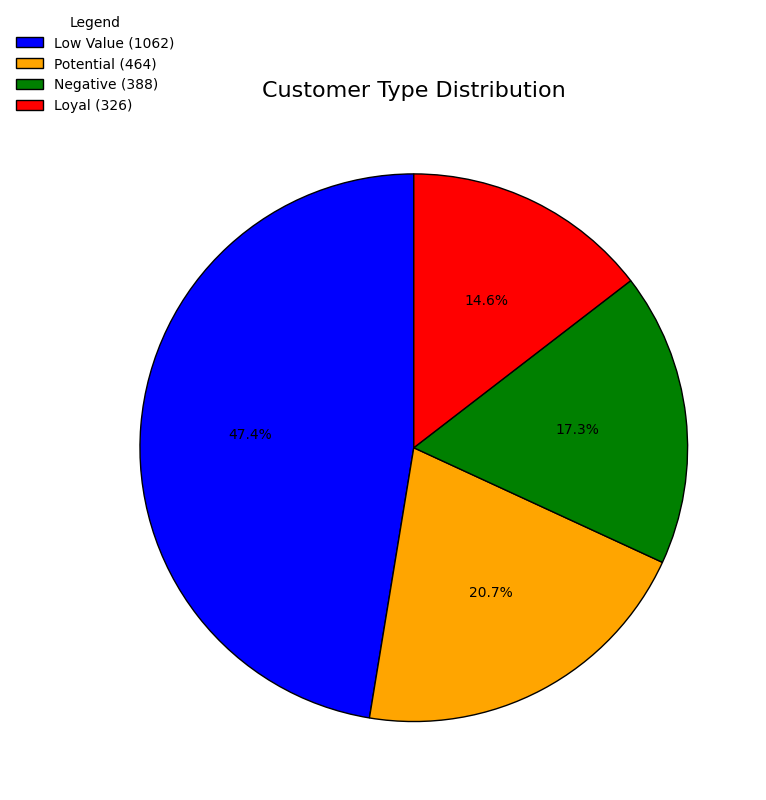

In [78]:
# Hàm trực quan hóa phân phối khách hàng bằng biểu đồ hình tròn với chú thích ở góc trên bên trái
def visualize_customer_distribution_pie_top_left(distribution):
    plt.figure(figsize=(8, 8))
    
    # Tạo biểu đồ hình tròn
    wedges, texts, autotexts = plt.pie(
        distribution,
        labels=None,  # Không hiển thị nhãn xung quanh biểu đồ
        autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
        startangle=90,
        colors=['blue', 'orange', 'green', 'red'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 10}  # Định dạng font chữ
    )
    
    # Thêm chú thích ở góc trên bên trái
    plt.legend(
        wedges,
        [f"{label} ({value})" for label, value in zip(distribution.index, distribution.values)],
        loc="upper left",  # Đặt chú thích ở góc trên bên trái
        bbox_to_anchor=(-0.1, 1.15),  # Điều chỉnh vị trí chú thích để nằm trên biểu đồ
        fontsize=10,
        title="Legend",
        frameon=False  # Không hiển thị khung viền xung quanh chú thích
    )
    
    plt.title("Customer Type Distribution", fontsize=16)
    plt.tight_layout()  # Tự động điều chỉnh khoảng cách để tránh bị đè
    plt.show()

# Gọi hàm trực quan hóa
visualize_customer_distribution_pie_top_left(customer_distribution_complete)
